## **Setup**

In [2]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='grade3', context='paper', fscale=1.5, spines=True, ticks=False)

#jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

# to make output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.rc('axes', lablesize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# location to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "intro-anns"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images/"+ CHAPTER_ID, fig_id + ".png")
    print("saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

## **Perceptrons**

Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss=”perceptron”, eta0=1, learning_rate=”constant”, penalty=None).

Note: we set max_iter and tol explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

coef_: weights assigned to the features.   
intercept_: constants in decision function.   

numpy meshgrid: Return coordinate matrices from coordinate vectors.

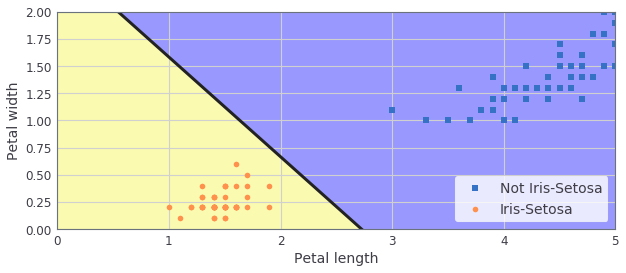

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

## **Activation functions**

the activation function of a node defines the output of that node, or "neuron," given an input or set of inputs. This output is then used as input for the next node and so on until a desired solution to the original problem is found.[1]

It maps the resulting values into the desired range such as between 0 to 1 or -1 to 1 etc. (depending upon the choice of activation function)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

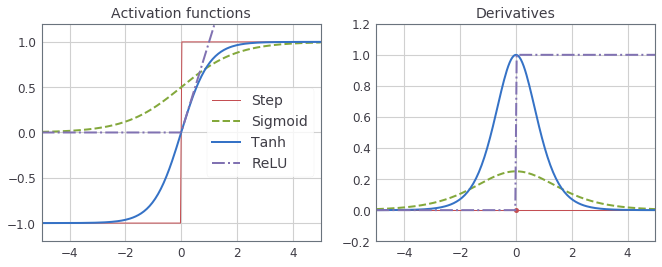

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

In [9]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

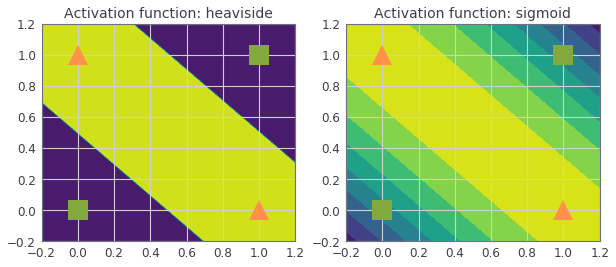

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## **FNN for MNIST**

### **Using the Estimator API (formerly tf.contrib.learn)**

In [11]:
import tensorflow as tf

Warning: tf.examples.tutorials.mnist is deprecated. We will use tf.keras.datasets.mnist instead. Moreover, the tf.contrib.learn API was promoted to tf.estimators and tf.feature_columns, and it has changed considerably. In particular, there is no infer_real_valued_columns_from_input() function or SKCompat class.

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [13]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efd50cd3ba8>, '_tf_random_seed': None, '_evaluation_master': '', '_is_chief': True, '_save_checkpoints_steps': None, '_service': None, '_train_distribute': None, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpifllt9yg', '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_task_id': 0, '_session_config': None, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_device_fn': None, '_task_type': 'worker'}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpifllt9yg/model.ckpt.
INFO:ten

INFO:tensorflow:global_step/sec: 238.991
INFO:tensorflow:loss = 0.88935024, step = 7301 (0.417 sec)
INFO:tensorflow:global_step/sec: 260.403
INFO:tensorflow:loss = 1.8299874, step = 7401 (0.384 sec)
INFO:tensorflow:global_step/sec: 246.361
INFO:tensorflow:loss = 0.65479344, step = 7501 (0.407 sec)
INFO:tensorflow:global_step/sec: 166.927
INFO:tensorflow:loss = 0.31361794, step = 7601 (0.600 sec)
INFO:tensorflow:global_step/sec: 244.726
INFO:tensorflow:loss = 1.1161945, step = 7701 (0.406 sec)
INFO:tensorflow:global_step/sec: 249.721
INFO:tensorflow:loss = 0.37955716, step = 7801 (0.400 sec)
INFO:tensorflow:global_step/sec: 255.202
INFO:tensorflow:loss = 4.0156446, step = 7901 (0.394 sec)
INFO:tensorflow:global_step/sec: 261.603
INFO:tensorflow:loss = 1.3457865, step = 8001 (0.381 sec)
INFO:tensorflow:global_step/sec: 250.631
INFO:tensorflow:loss = 1.6311818, step = 8101 (0.397 sec)
INFO:tensorflow:global_step/sec: 318.953
INFO:tensorflow:loss = 0.4472192, step = 8201 (0.314 sec)
INFO:t

INFO:tensorflow:global_step/sec: 237.952
INFO:tensorflow:loss = 0.028873099, step = 15501 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.522
INFO:tensorflow:loss = 0.19080624, step = 15601 (0.410 sec)
INFO:tensorflow:global_step/sec: 251.597
INFO:tensorflow:loss = 0.13829492, step = 15701 (0.401 sec)
INFO:tensorflow:global_step/sec: 207.449
INFO:tensorflow:loss = 0.039669454, step = 15801 (0.479 sec)
INFO:tensorflow:global_step/sec: 207.889
INFO:tensorflow:loss = 0.03399875, step = 15901 (0.480 sec)
INFO:tensorflow:global_step/sec: 241.333
INFO:tensorflow:loss = 0.22149272, step = 16001 (0.415 sec)
INFO:tensorflow:global_step/sec: 285.391
INFO:tensorflow:loss = 0.17044064, step = 16101 (0.352 sec)
INFO:tensorflow:global_step/sec: 246.711
INFO:tensorflow:loss = 0.07975854, step = 16201 (0.404 sec)
INFO:tensorflow:global_step/sec: 214.641
INFO:tensorflow:loss = 0.005346331, step = 16301 (0.466 sec)
INFO:tensorflow:global_step/sec: 214.995
INFO:tensorflow:loss = 0.08343289, step = 16401

INFO:tensorflow:loss = 0.0021232993, step = 23601 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.491
INFO:tensorflow:loss = 0.010555075, step = 23701 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.694
INFO:tensorflow:loss = 0.011227696, step = 23801 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.177
INFO:tensorflow:loss = 0.10036063, step = 23901 (0.373 sec)
INFO:tensorflow:global_step/sec: 335.101
INFO:tensorflow:loss = 0.055797905, step = 24001 (0.299 sec)
INFO:tensorflow:global_step/sec: 208.093
INFO:tensorflow:loss = 0.044752374, step = 24101 (0.481 sec)
INFO:tensorflow:global_step/sec: 228.73
INFO:tensorflow:loss = 0.123075, step = 24201 (0.437 sec)
INFO:tensorflow:global_step/sec: 252.241
INFO:tensorflow:loss = 0.069248736, step = 24301 (0.397 sec)
INFO:tensorflow:global_step/sec: 280.604
INFO:tensorflow:loss = 0.0025267943, step = 24401 (0.357 sec)
INFO:tensorflow:global_step/sec: 289.899
INFO:tensorflow:loss = 0.0684563, step = 24501 (0.345 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.0035637885, step = 31701 (0.401 sec)
INFO:tensorflow:global_step/sec: 255.744
INFO:tensorflow:loss = 0.035387248, step = 31801 (0.392 sec)
INFO:tensorflow:global_step/sec: 259.222
INFO:tensorflow:loss = 0.01215538, step = 31901 (0.385 sec)
INFO:tensorflow:global_step/sec: 295.636
INFO:tensorflow:loss = 0.0019090145, step = 32001 (0.338 sec)
INFO:tensorflow:global_step/sec: 297.546
INFO:tensorflow:loss = 0.016868312, step = 32101 (0.336 sec)
INFO:tensorflow:global_step/sec: 245.171
INFO:tensorflow:loss = 0.029690567, step = 32201 (0.407 sec)
INFO:tensorflow:global_step/sec: 263.541
INFO:tensorflow:loss = 0.009240166, step = 32301 (0.381 sec)
INFO:tensorflow:global_step/sec: 259.491
INFO:tensorflow:loss = 0.03340109, step = 32401 (0.384 sec)
INFO:tensorflow:global_step/sec: 258.889
INFO:tensorflow:loss = 0.014037373, step = 32501 (0.385 sec)
INFO:tensorflow:global_step/sec: 303.265
INFO:tensorflow:loss = 0.01266415, step = 32601 (0.330 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 268.172
INFO:tensorflow:loss = 0.008695405, step = 39801 (0.373 sec)
INFO:tensorflow:global_step/sec: 340.697
INFO:tensorflow:loss = 0.03565914, step = 39901 (0.294 sec)
INFO:tensorflow:global_step/sec: 354.364
INFO:tensorflow:loss = 0.023273949, step = 40001 (0.281 sec)
INFO:tensorflow:global_step/sec: 358.185
INFO:tensorflow:loss = 0.06283781, step = 40101 (0.279 sec)
INFO:tensorflow:global_step/sec: 338.98
INFO:tensorflow:loss = 0.009508396, step = 40201 (0.295 sec)
INFO:tensorflow:global_step/sec: 484.052
INFO:tensorflow:loss = 0.014770308, step = 40301 (0.207 sec)
INFO:tensorflow:global_step/sec: 415.375
INFO:tensorflow:loss = 0.033274982, step = 40401 (0.240 sec)
INFO:tensorflow:global_step/sec: 365.338
INFO:tensorflow:loss = 0.01946209, step = 40501 (0.274 sec)
INFO:tensorflow:global_step/sec: 314.389
INFO:tensorflow:loss = 0.03879475, step = 40601 (0.318 sec)
INFO:tensorflow:global_step/sec: 352.262
INFO:tensorflow:loss = 0.0056425845, step = 40

In [14]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-08-01:58:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpifllt9yg/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-08-01:58:32
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9797, average_loss = 0.11353641, global_step = 44000, loss = 14.371698
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpifllt9yg/model.ckpt-44000


In [15]:
eval_results

{'accuracy': 0.9797,
 'average_loss': 0.11353641,
 'global_step': 44000,
 'loss': 14.371698}

In [16]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpifllt9yg/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([-7.1479   , -3.4197068, -0.9660522,  1.4724569, -9.400401 ,
        -6.4369917, -9.518    , 25.306019 , -2.3008854,  3.9678197],
       dtype=float32),
 'probabilities': array([8.0434486e-15, 3.3463862e-13, 3.8921015e-12, 4.4587795e-11,
        8.4565440e-16, 1.6375149e-14, 7.5183079e-16, 1.0000000e+00,
        1.0244093e-12, 5.4067673e-10], dtype=float32)}

### **Using plain Tensorflow**

In [17]:
import tensorflow as tf

n_inputs = 28*28 #MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [18]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [19]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [20]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [21]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [22]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [23]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [24]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [25]:
n_epochs = 40
batch_size = 50

In [26]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [27]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9148
1 Batch accuracy: 0.92 Val accuracy: 0.9358
2 Batch accuracy: 0.96 Val accuracy: 0.9452
3 Batch accuracy: 0.92 Val accuracy: 0.951
4 Batch accuracy: 0.98 Val accuracy: 0.9562
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9646
9 Batch accuracy: 0.96 Val accuracy: 0.9662
10 Batch accuracy: 0.92 Val accuracy: 0.9682
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.9674
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9732
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9744
19 Batch accuracy: 0.98 Val accuracy: 0.9742
20 Batch accuracy: 1.0 Val accuracy: 0.9756
21 Batch accuracy: 1.0 Val accuracy: 0.9756
22 Batch accuracy: 0.98 Val ac

In [28]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [29]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [30]:
#from tensorflow_graph_in_jupyter import show_graph

In [31]:
#show_graph(tf.get_default_graph())

### **Using dense() instead of neuron_layer()**

The dense() function is almost identical to the fully_connected() function, except for a few minor differences:

several parameters are renamed: scope becomes name, activation_fn becomes activation (and similarly the _fn suffix is removed from other parameters such as normalizer_fn), weights_initializer becomes kernel_initializer, etc.
the default activation is now None rather than tf.nn.relu.

In [32]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10 

In [33]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [34]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [35]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [36]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [37]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [38]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [39]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.9612
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9652
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9682
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9722
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.9732
18 Batch accuracy: 0.98 Validation accuracy: 0.9746
19 Batch accuracy: 0.96 Val

In [41]:
#show_graph(tf.get_default_graph())

--------------------------------------------------------- END --------------------------------------------------------- 